# Plotting CAMS data

## Author: Riyaz Khan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

We'll start by opening up some CAMS $NO_{2}$ data and showing an overview of the dataset.

In [2]:
no2 = xr.open_dataarray("cams/_grib2netcdf-atls04-a82bacafb5c306db76464bc7e824bb75-tJgG03.nc")
no2

<xarray.DataArray 'tcno2' (time: 21, latitude: 451, longitude: 900)>
[8523900 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.4 0.8 1.2 1.6 2.0 2.4 2.8 3.2 3.6 ...
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 88.4 88.0 87.6 87.2 ...
  * time       (time) datetime64[ns] 2018-06-01T12:00:00 2018-06-02T12:00:00 ...
Attributes:
    units:      kg m**-2
    long_name:  Total column Nitrogen dioxide

## Extracting and plotting point data
First, let's plot the $NO_{2}$ column over Darmstadt.

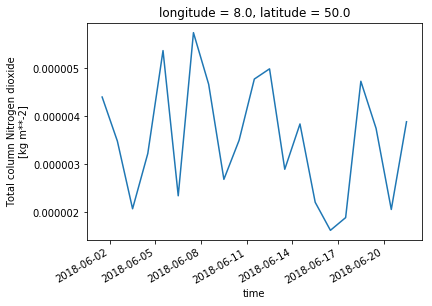

In [3]:
# We can also use isel to select by index, but we'll select for equality
first_point = no2.isel(latitude=0, longitude=0)  # Select by position in arrays
darmstadt = no2.sel(latitude=50, longitude=8)    # select values
darmstadt.plot()

Looks like $NO_{2}$ concentration was cyclical throughout June.

We can also plot the time series for multiple points at the same time. Here we plot $NO_{2}$ over ECMWF in Reading and EUMETSAT in Darmstadt.

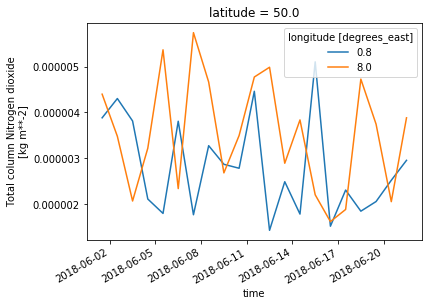

In [4]:
no2.sel(latitude=50, longitude=[1, 8], method="nearest").plot.line(x="time")

## Histograms
We can also plot a histogram of the entire dataset. In order to have sensible-looking bins, we plot the logarithm of the $NO_{2}$.

(array([2.665880e+05, 5.268100e+05, 2.825010e+05, 4.180010e+05,
        3.534644e+06, 3.240702e+06, 2.301080e+05, 2.322700e+04,
        1.297000e+03, 2.200000e+01]),
 array([-19.46436119, -18.37555656, -17.28675194, -16.19794731,
        -15.10914268, -14.02033806, -12.93153343, -11.84272881,
        -10.75392418,  -9.66511955,  -8.57631493]),
 <a list of 10 Patch objects>)

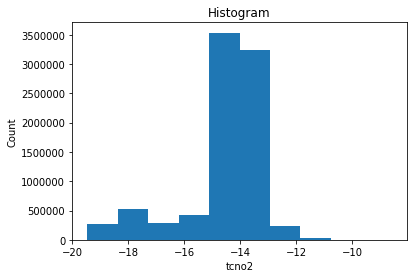

In [5]:
np.log(no2).plot()

## Maps
For a first glance, we plot a single time slice to see what we can see.

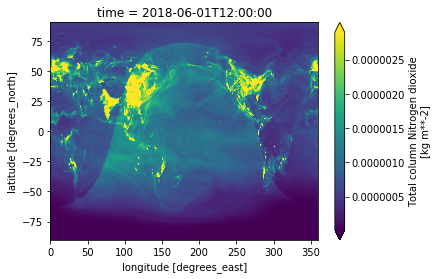

In [6]:
# Using geophysical units. `robust` disregards outliers for colour map creation.
no2.isel(time=0).plot(robust=True) 

This is fine for getting a first glance, but we can reproject this onto a globe or any other coordinate system we like.

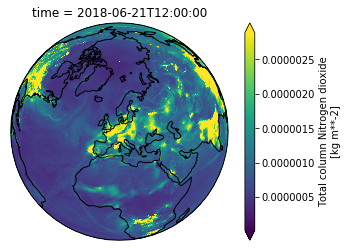

In [7]:
# Centered over Darmstadt
ax = plt.axes(projection=ccrs.Orthographic(8.7, 49.9))
ax.coastlines()
# Use last time step in array.
p = no2.isel(time=-1).plot(transform=ccrs.PlateCarree(), robust=True)